# Author: Sheetal V K

## Task 1: Prediction using Supervised ML - The Sparks Foundation

## Objective: To predict the percentage of a student based on the number of hours of study.

# Step 1: Import the datasets and libraries, check shape and datatype. 

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Importing data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [7]:
#Displaying the data
print("Displaying the data")
data.head()

Displaying the data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
#checking the shape
data.shape

(25, 2)

In [9]:
#describing the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#to check the datatype
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
#checking for null value in the dataset
if(data.isnull == True):
    print("Null value present in the dataset")
else:
    print("No null value present- can visualize the data")

No null value present- can visualize the data


# Step 2: Visualise the dataset

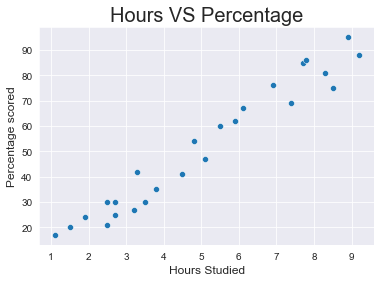

In [14]:
# Visualization of the data
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Hours VS Percentage',size=20)
plt.ylabel('Percentage scored', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### From the above graph we can observe a correlation between 'Hours Studied' and 'Percentage Scored'. 

#### A Regression Line is plotted to confirm the correlation.

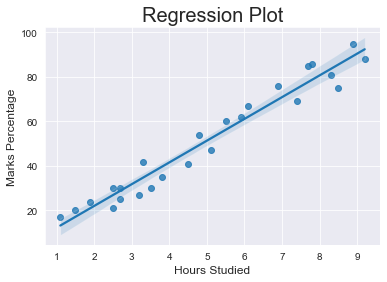

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [15]:
#Plotting a Regression Line
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

#### Now this confirms that the variables are positively correlated.

# Step 3: Data Preprocessing

In [30]:
#division of data into "attributes" (inputs) and "labels" (outputs)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

# Step 4: Training the Model

In [37]:
#Splitting the data into training and testing data
#Training the model using training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


# Step 5: To make predictions

In [50]:
#Making predictions using test data
y_pred = regressor.predict(X_test)
print(X_test,y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [53]:
#Display of prediction
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Percentage': [k for k in y_pred]})
prediction

,Hours,Predicted Percentage
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


# Step 6: Comparing the actual and predicted values

In [54]:
compared_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
compared_result

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Step 7: Visually comparing the predicted and actual results

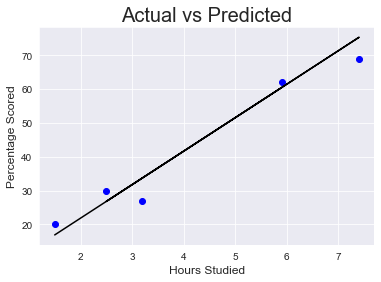

In [56]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage Scored', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

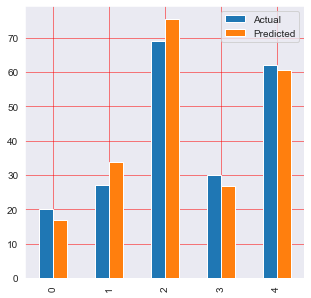

In [57]:
# Plotting the Bar graph
compared_result.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()


# Step 8: Testing the model for our own data - hours = 9.25

In [58]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


# Step 9: Evaluating the model

In [59]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


#### The R-2 gives the score of the model fit. In this case it is a decent score.

# Conclusion

#### This was a simple linear regression task with 2 variables, to predict the percentage of the student based on the number of hours of study. Predicted score if a student studies for 9.25 hrs /day = 93.69173248737539

# Thank You